In [7]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import chart_studio.plotly as py
from statsmodels.tsa.stattools import adfuller
import plotly.graph_objs as go
import plotly.offline as pyoff
from scipy.stats import norm
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import seaborn as sns

In [8]:
#import Keras
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split


In [9]:
#read the data in csv
df_sales = pd.read_csv('TRAIN (1).csv')

In [10]:
df_sales.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

In [11]:
#convert date field from string to datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

In [12]:
df_sales.head(10)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
5,T1000006,249,S1,L3,R2,2018-01-01,1,Yes,39,34211.22
6,T1000007,248,S1,L1,R2,2018-01-01,1,Yes,40,35352.66
7,T1000008,247,S1,L1,R3,2018-01-01,1,Yes,64,52650.00
8,T1000009,246,S3,L1,R3,2018-01-01,1,Yes,62,42633.78
9,T1000010,254,S4,L1,R1,2018-01-01,1,Yes,87,62572.80


In [13]:
df_sales.shape

(188340, 10)

In [14]:
df_sales = df_sales.sort_values(by="Date")

In [15]:
df_sales['Month']=df_sales['Date'].dt.month.astype('int')
df_sales['Year']=df_sales['Date'].dt.year.astype('int')
df_sales['Day']=df_sales['Date'].dt.day.astype('int')


In [16]:
df_sales.head(10)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Month,Year,Day
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,1,2018,1
248,T1000249,64,S3,L1,R2,2018-01-01,1,Yes,52,42293.94,1,2018,1
247,T1000248,65,S1,L2,R2,2018-01-01,1,Yes,60,46070.64,1,2018,1
246,T1000247,66,S3,L3,R3,2018-01-01,1,Yes,28,26151.12,1,2018,1
245,T1000246,67,S2,L5,R1,2018-01-01,1,Yes,65,44949.45,1,2018,1
244,T1000245,49,S4,L1,R2,2018-01-01,1,Yes,37,30395.52,1,2018,1
243,T1000244,48,S1,L1,R2,2018-01-01,1,Yes,77,57111.12,1,2018,1
242,T1000243,27,S1,L3,R3,2018-01-01,1,Yes,35,26910.84,1,2018,1
241,T1000242,37,S1,L3,R3,2018-01-01,1,Yes,61,46580.85,1,2018,1
249,T1000250,63,S1,L1,R2,2018-01-01,1,Yes,25,18729.36,1,2018,1


In [17]:
df_sales=df_sales[(df_sales.Sales != 0)]

In [18]:
df_sales.shape

(188321, 13)

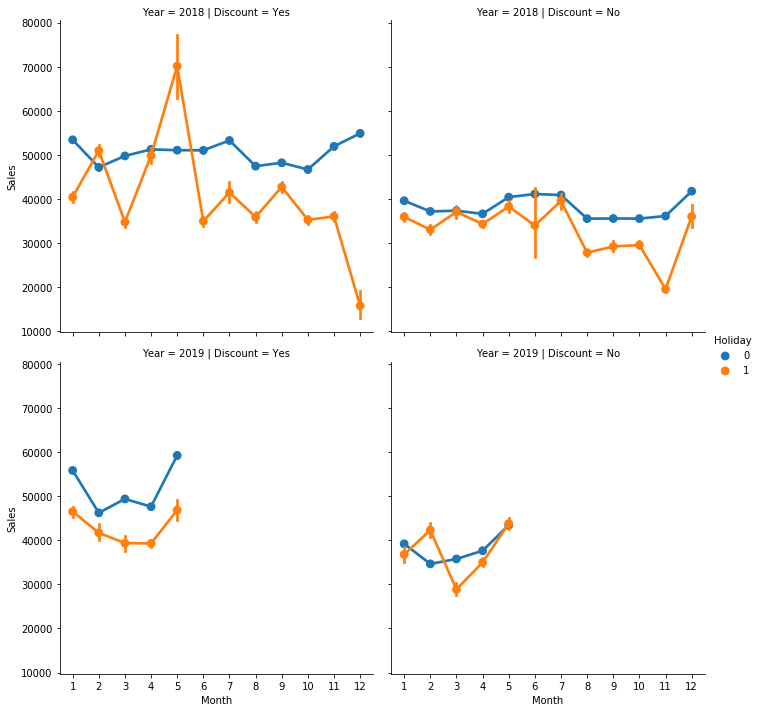

In [19]:
sns.factorplot(data = df_sales, x ="Month", y = "Sales", 
               col = 'Discount', # per store type in cols
               hue='Holiday',
               row = "Year")

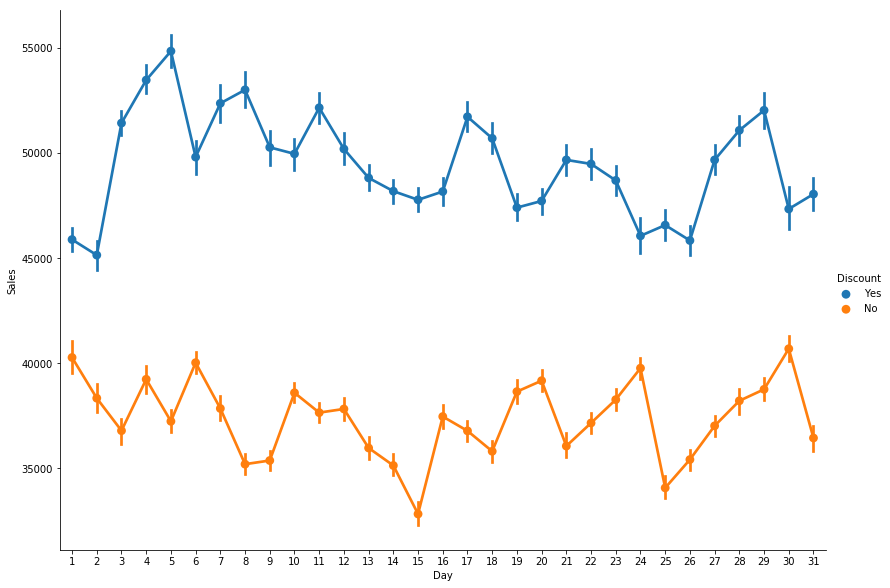

In [20]:

sns.factorplot(data = df_sales, x = "Day", y = "Sales", hue = "Discount",  height=8.27, aspect=11.7/8.27)

In [21]:
df_sales.isna().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
Month            0
Year             0
Day              0
dtype: int64

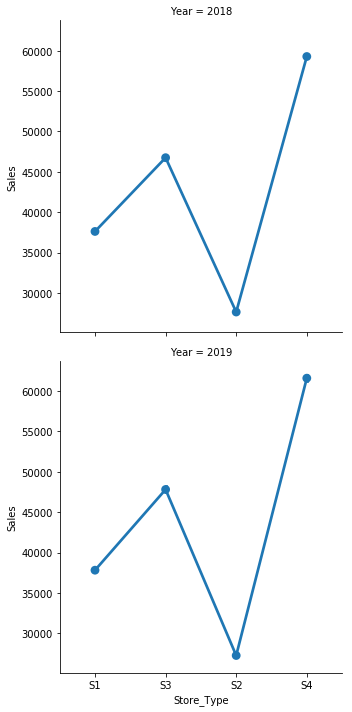

In [22]:
sns.factorplot(data = df_sales, x ="Store_Type", y = "Sales", 
               row = "Year")

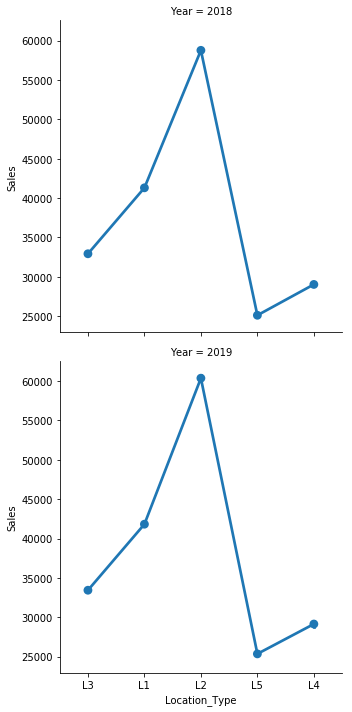

In [23]:
sns.factorplot(data = df_sales, x ="Location_Type", y = "Sales", 
               row = "Year")

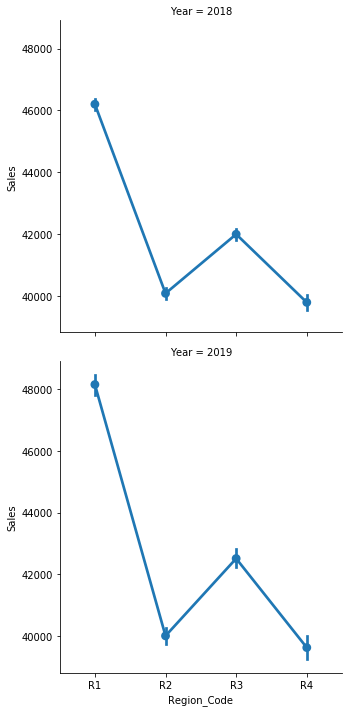

In [24]:
sns.factorplot(data = df_sales, x ="Region_Code", y = "Sales", 
               row = "Year")

In [25]:
df_sales.head(10)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Month,Year,Day
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,1,2018,1
248,T1000249,64,S3,L1,R2,2018-01-01,1,Yes,52,42293.94,1,2018,1
247,T1000248,65,S1,L2,R2,2018-01-01,1,Yes,60,46070.64,1,2018,1
246,T1000247,66,S3,L3,R3,2018-01-01,1,Yes,28,26151.12,1,2018,1
245,T1000246,67,S2,L5,R1,2018-01-01,1,Yes,65,44949.45,1,2018,1
244,T1000245,49,S4,L1,R2,2018-01-01,1,Yes,37,30395.52,1,2018,1
243,T1000244,48,S1,L1,R2,2018-01-01,1,Yes,77,57111.12,1,2018,1
242,T1000243,27,S1,L3,R3,2018-01-01,1,Yes,35,26910.84,1,2018,1
241,T1000242,37,S1,L3,R3,2018-01-01,1,Yes,61,46580.85,1,2018,1
249,T1000250,63,S1,L1,R2,2018-01-01,1,Yes,25,18729.36,1,2018,1


In [26]:
df_sales=df_sales.drop(columns=['ID', 'Month', 'Year','Day'])

In [27]:
df_sales.index

Int64Index([     0,    248,    247,    246,    245,    244,    243,    242,
               241,    249,
            ...
            188097, 188096, 188095, 188094, 188093, 188092, 188091, 188090,
            188088, 188339],
           dtype='int64', length=188321)

In [28]:
df_sales=df_sales.set_index('Date')

In [29]:
df_sales.index

DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01',
               '2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01',
               '2018-01-01', '2018-01-01',
               ...
               '2019-05-31', '2019-05-31', '2019-05-31', '2019-05-31',
               '2019-05-31', '2019-05-31', '2019-05-31', '2019-05-31',
               '2019-05-31', '2019-05-31'],
              dtype='datetime64[ns]', name='Date', length=188321, freq=None)

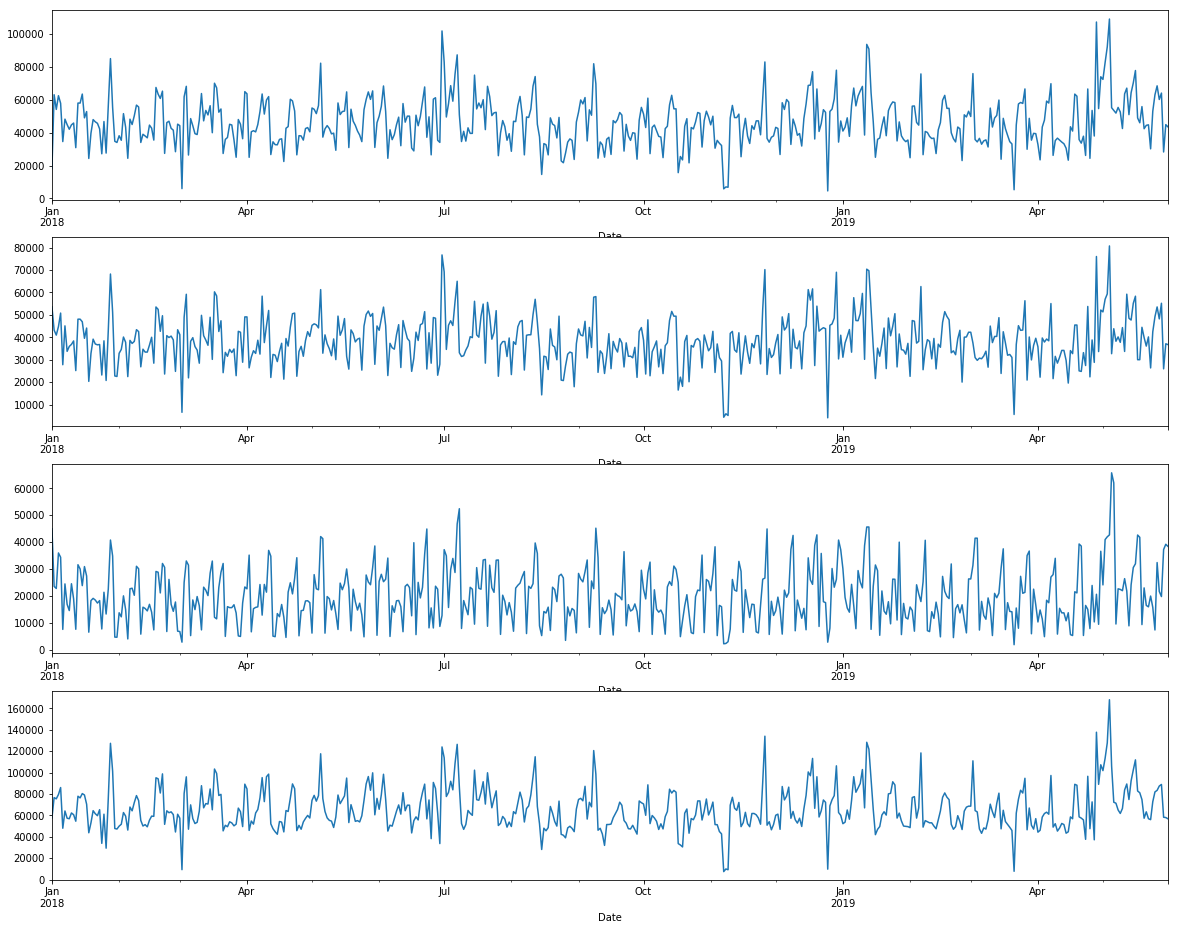

In [30]:
# Data Preparation: input should be float type
df_sales['Sales'] = df_sales['Sales'] * 1.0

# Assigning one store from each category
df_sales_S3 = df_sales[df_sales.Store_id == 2]['Sales']
df_sales_S1 = df_sales[df_sales.Store_id == 4]['Sales']
df_sales_S2 = df_sales[df_sales.Store_id == 67]['Sales']
df_sales_S4 = df_sales[df_sales.Store_id == 11]['Sales']
frame, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (20, 16))
# Visualize Trend 
df_sales_S3.resample('D').sum().plot(ax = ax1)
df_sales_S1.resample('D').sum().plot(ax = ax2)
df_sales_S2.resample('D').sum().plot(ax = ax3)
df_sales_S4.resample('D').sum().plot(ax = ax4)

In [31]:
# Function to test the stationarity
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    roll_mean = timeseries.rolling(window=7).mean()
    roll_std = timeseries.rolling(window=7).std()
# Plotting rolling statistics:
    orig = plt.plot(timeseries.resample('D').mean(), color='blue',label='Original')
    mean = plt.plot(roll_mean.resample('D').mean(), color='red', label='Rolling Mean')
    std = plt.plot(roll_std.resample('D').mean(), color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)
    
  # Performing Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
           print(key, value)


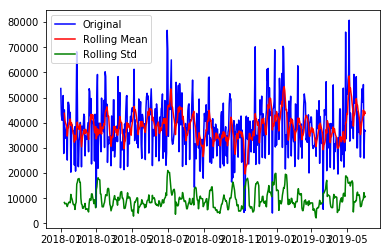

Results of Dickey-Fuller Test:
ADF Statistic: -4.419809
p-value: 0.000274
Critical Values:
1% -3.443391504492468
5% -2.8672917032172953
10% -2.5698334393109095


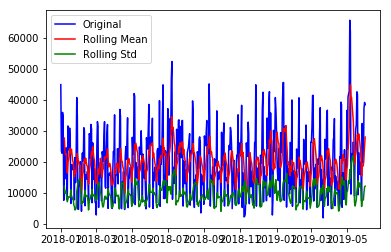

Results of Dickey-Fuller Test:
ADF Statistic: -4.513577
p-value: 0.000186
Critical Values:
1% -3.4434175660489905
5% -2.8673031724657454
10% -2.5698395516760275


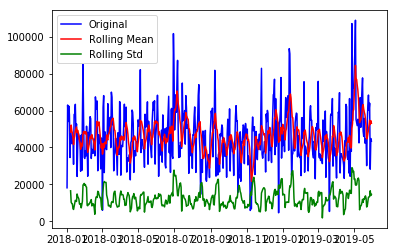

Results of Dickey-Fuller Test:
ADF Statistic: -4.384921
p-value: 0.000316
Critical Values:
1% -3.443391504492468
5% -2.8672917032172953
10% -2.5698334393109095


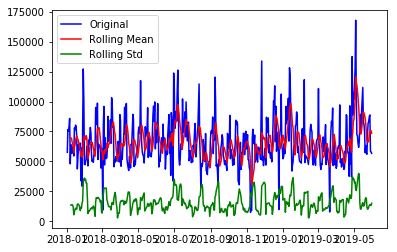

Results of Dickey-Fuller Test:
ADF Statistic: -4.452201
p-value: 0.000240
Critical Values:
1% -3.443391504492468
5% -2.8672917032172953
10% -2.5698334393109095


In [32]:
# Testing stationarity of store type S1
test_stationarity(df_sales_S1)
# Testing stationarity of store type S2
test_stationarity(df_sales_S2)
# Testing stationarity of store type S3
test_stationarity(df_sales_S3)
# Testing stationarity of store type S4
test_stationarity(df_sales_S4)

In [33]:
# Plotting seasonality and trend
def plot_timeseries(df_sales,Store_Type):
    fig, axes = plt.subplots(2, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    decomposition= seasonal_decompose(df_sales, model = 'additive',freq=365)
    estimated_trend = decomposition.trend
    estimated_seasonal = decomposition.seasonal
    estimated_residual = decomposition.resid
    
    axes[1].plot(estimated_seasonal, 'g', label='Seasonality')
    axes[1].legend(loc='upper left');
    
    axes[0].plot(estimated_trend, label='Trend')
    axes[0].legend(loc='upper left');
    plt.title('Decomposition Plots')


In [34]:
df_sales.dtypes

Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

In [35]:
print(df_sales['Store_Type'].unique())
print(df_sales['Location_Type'].unique())
print(df_sales['Region_Code'].unique())
print(df_sales['Discount'].unique())


['S1' 'S3' 'S2' 'S4']
['L3' 'L1' 'L2' 'L5' 'L4']
['R1' 'R2' 'R3' 'R4']
['Yes' 'No']


In [36]:
df_sales_Onehotencode= pd.get_dummies(df_sales, columns = ['Store_Type', 'Location_Type','Region_Code','Discount'])
print(df_sales_Onehotencode)

            Store_id  Holiday  #Order     Sales  Store_Type_S1  Store_Type_S2  \
Date                                                                            
2018-01-01         1        1       9   7011.84              1              0   
2018-01-01        64        1      52  42293.94              0              0   
2018-01-01        65        1      60  46070.64              1              0   
2018-01-01        66        1      28  26151.12              0              0   
2018-01-01        67        1      65  44949.45              0              1   
2018-01-01        49        1      37  30395.52              0              0   
2018-01-01        48        1      77  57111.12              1              0   
2018-01-01        27        1      35  26910.84              1              0   
2018-01-01        37        1      61  46580.85              1              0   
2018-01-01        63        1      25  18729.36              1              0   
2018-01-01        30        

In [37]:
df_sales_Onehotencode.index

DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01',
               '2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01',
               '2018-01-01', '2018-01-01',
               ...
               '2019-05-31', '2019-05-31', '2019-05-31', '2019-05-31',
               '2019-05-31', '2019-05-31', '2019-05-31', '2019-05-31',
               '2019-05-31', '2019-05-31'],
              dtype='datetime64[ns]', name='Date', length=188321, freq=None)

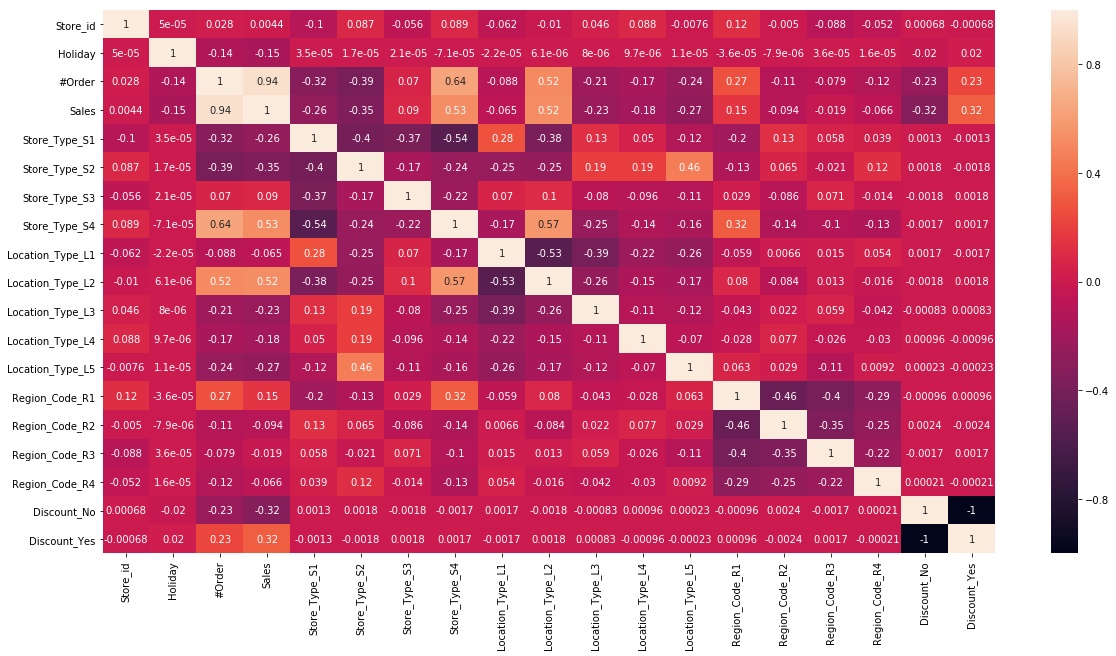

In [38]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_sales_Onehotencode.corr(), annot=True)

In [39]:
def auto_corr(sales):
    lag_acf = acf(sales, nlags=30)
    lag_pacf = pacf(sales,nlags=20,method='ols')
    
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0, linestyle='--', color='red')
    plt.axhline(y=1.96/np.sqrt(len(df_sales_S1)), linestyle='--', color='red')
    plt.axhline(y=-1.96/np.sqrt(len(df_sales_S1)), linestyle='--', color='red')
    plt.title('ACF')
    
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0, linestyle='--', color='red')
    plt.axhline(y=1.96/np.sqrt(len(df_sales_S1)), linestyle='--', color='red')
    plt.axhline(y=-1.96/np.sqrt(len(df_sales_S1)), linestyle='--', color='red')
    plt.title('PACF')

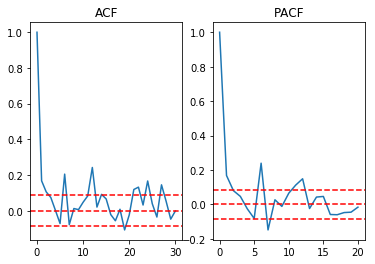

In [40]:
auto_corr(df_sales_S1)

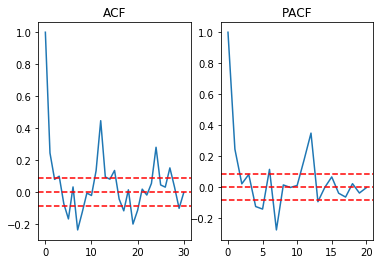

In [41]:
auto_corr(df_sales_S2)

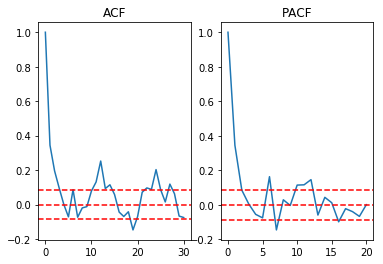

In [42]:
auto_corr(df_sales_S3)

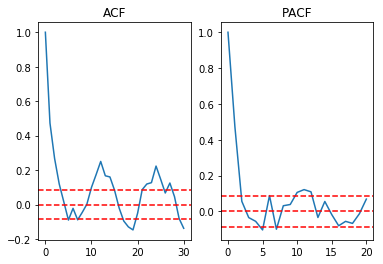

In [43]:
auto_corr(df_sales_S4)

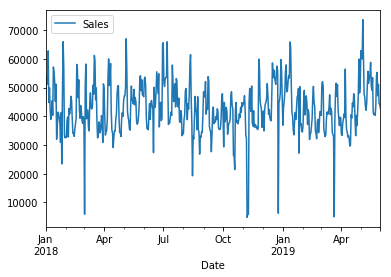

In [44]:
# Summering sales on per week basis 
# ARIMA = Autoregresive Integrated Moving Average 


train_arima = df_sales_Onehotencode.resample('D').mean()
#train_arima = df_sales_Onehotencode
train_arima = train_arima[['Sales']]
train_arima.plot()

In [45]:
train_arima.head()

,Sales
Date,
2018-01-01,42042.423288
2018-01-02,53677.849315
2018-01-03,51102.813699
2018-01-04,54674.704110
2018-01-05,62746.989041


In [46]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 17) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA: ')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA: 
SARIMAX: (0, 0, 1) x (0, 0, 1, 17)
SARIMAX: (0, 0, 1) x (0, 1, 0, 17)
SARIMAX: (0, 1, 0) x (0, 1, 1, 17)
SARIMAX: (0, 1, 0) x (1, 0, 0, 17)


In [47]:
# Determing p,d,q combinations with AIC scores.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_arima,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}17 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 17)17 - AIC:12469.567052498265
ARIMA(0, 0, 0)x(0, 0, 1, 17)17 - AIC:11766.745096336861
ARIMA(0, 0, 0)x(0, 1, 0, 17)17 - AIC:10883.88981651216
ARIMA(0, 0, 0)x(0, 1, 1, 17)17 - AIC:10307.084229728509
ARIMA(0, 0, 0)x(1, 0, 0, 17)17 - AIC:10894.52013104926
ARIMA(0, 0, 0)x(1, 0, 1, 17)17 - AIC:10695.488056929773
ARIMA(0, 0, 0)x(1, 1, 0, 17)17 - AIC:10309.891250853756
ARIMA(0, 0, 0)x(1, 1, 1, 17)17 - AIC:10249.587691050721
ARIMA(0, 0, 1)x(0, 0, 0, 17)17 - AIC:12094.982910999968
ARIMA(0, 0, 1)x(0, 0, 1, 17)17 - AIC:11620.977246957249
ARIMA(0, 0, 1)x(0, 1, 0, 17)17 - AIC:10691.01119832196
ARIMA(0, 0, 1)x(0, 1, 1, 17)17 - AIC:10149.10694324362
ARIMA(0, 0, 1)x(1, 0, 0, 17)17 - AIC:11608.429466929083
ARIMA(0, 0, 1)x(1, 0, 1, 17)17 - AIC:11553.453588939647
ARIMA(0, 0, 1)x(1, 1, 0, 17)17 - AIC:10210.542920976752
ARIMA(0, 0, 1)x(1, 1, 1, 17)17 - AIC:10138.86826314513
ARIMA(0, 1, 0)x(0, 0, 0, 17)17 - AIC:10740.1776581726
ARIMA(0, 1, 0)x(0, 0, 1, 17)17 - AIC:10382.495705509718

In [55]:
model_sarima = sm.tsa.statespace.SARIMAX(train_arima,
                                        order=(1, 1, 1),
                                        seasonal_order=(1,1,1,17),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
results_sarima= model_sarima.fit()
print(results_sarima.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5906      0.069      8.509      0.000       0.455       0.727
ma.L1         -0.9768      0.030    -33.069      0.000      -1.035      -0.919
ar.S.L17      -0.1017      0.111     -0.913      0.361      -0.320       0.117
ma.S.L17      -0.8614      0.057    -15.023      0.000      -0.974      -0.749
sigma2      1.461e+08   1.07e-10   1.37e+18      0.000    1.46e+08    1.46e+08


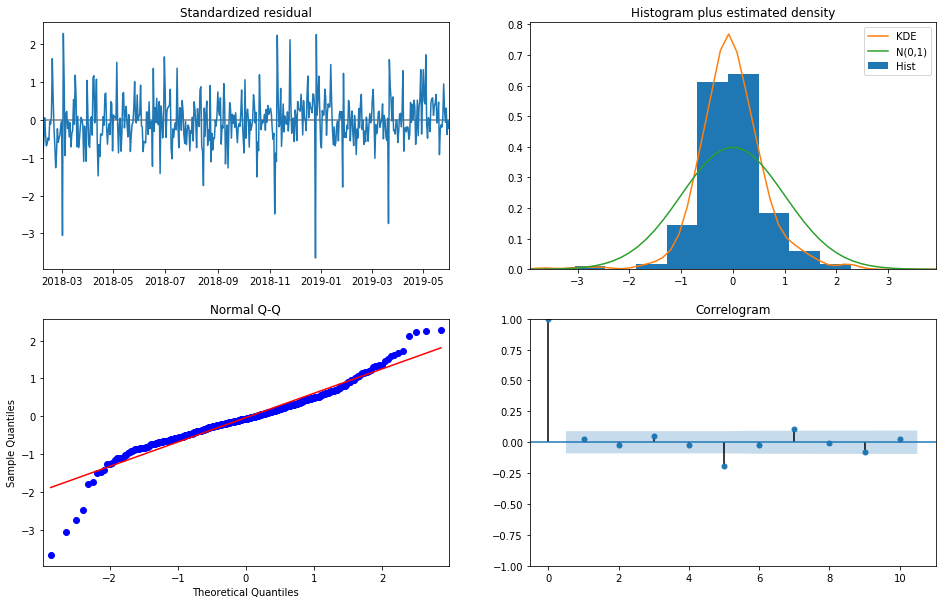

In [56]:
# Checking diagnostic plots
results_sarima.plot_diagnostics(figsize=(16, 10))
plt.show()

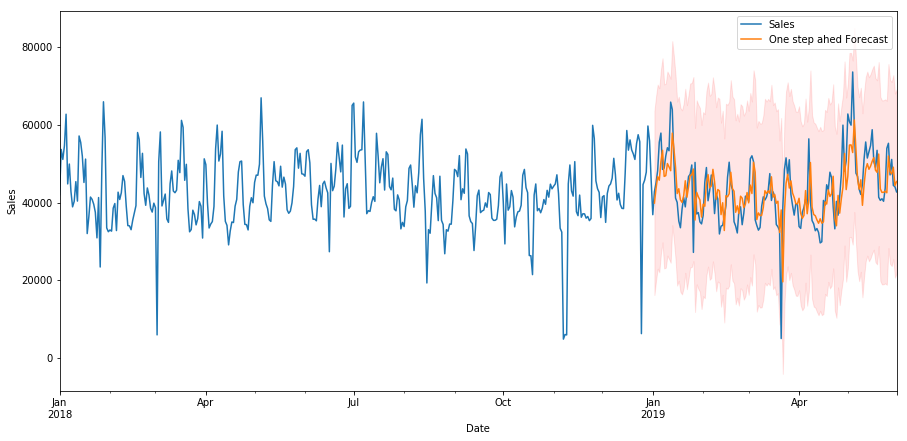

In [95]:
pred = results_sarima.get_prediction(start=366, end=515, dynamic=False)

# Get confidence interval of forecast 
pred_ci = pred.conf_int()

ax = train_arima['2018':].plot(label='Observed', figsize=(15,7))
pred.predicted_mean.plot(ax=ax, label='One step ahed Forecast', alpha=1)

ax.fill_between(pred_ci.index, 
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:,1],
               color='r', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()



In [96]:
train_arima_forecasted = pred.predicted_mean
train_arima_truth = train_arima['2019-01-02':]

In [97]:
print(train_arima_truth)

                   Sales
Date                    
2019-01-02  42811.627397
2019-01-03  45074.375342
2019-01-04  48241.331507
2019-01-05  55541.457534
2019-01-06  57885.879452
2019-01-07  48533.112329
2019-01-08  48856.183562
2019-01-09  52019.646575
2019-01-10  54110.350685
2019-01-11  53339.975342
2019-01-12  65862.090411
2019-01-13  63960.798411
2019-01-14  50727.910603
2019-01-15  41161.029781
2019-01-16  40055.005479
2019-01-17  35240.079452
2019-01-18  33516.928767
2019-01-19  38293.249315
2019-01-20  41312.243836
2019-01-21  38889.452055
2019-01-22  43070.482192
2019-01-23  46710.460274
2019-01-24  47274.673973
2019-01-25  49680.041096
2019-01-26  27170.004658
2019-01-27  50334.147945
2019-01-28  37075.438356
2019-01-29  37423.273973
2019-01-30  35024.153425
2019-01-31  34508.654795
...                  ...
2019-05-02  60830.219178
2019-05-03  59928.410959
2019-05-04  73618.676712
2019-05-05  59604.065753
2019-05-06  47573.095890
2019-05-07  46736.276712
2019-05-08  43397.950685


In [98]:
print(train_arima_forecasted)

Date
2019-01-02    39871.272206
2019-01-03    43612.386958
2019-01-04    46671.332175
2019-01-05    45753.337090
2019-01-06    50501.613844
2019-01-07    53453.390872
2019-01-08    46733.976017
2019-01-09    46922.931301
2019-01-10    50051.071704
2019-01-11    49176.768496
2019-01-12    48202.296754
2019-01-13    57878.673582
2019-01-14    53908.716832
2019-01-15    49104.422094
2019-01-16    42314.415093
2019-01-17    43555.766607
2019-01-18    40696.079613
2019-01-19    40048.083165
2019-01-20    41744.287116
2019-01-21    45612.172695
2019-01-22    41371.389435
2019-01-23    44036.797398
2019-01-24    46970.848940
2019-01-25    47094.714719
2019-01-26    48631.850967
2019-01-27    35503.980516
2019-01-28    42645.081567
2019-01-29    41500.798765
2019-01-30    40689.881594
2019-01-31    36261.258717
                  ...     
2019-05-02    54813.204559
2019-05-03    54843.990363
2019-05-04    52877.261902
2019-05-05    61255.803480
2019-05-06    53434.561280
2019-05-07    46075.487

In [99]:
from sklearn.metrics import mean_squared_log_error
msle_arima=mean_squared_log_error(train_arima_truth, train_arima_forecasted)
print('msle_arima = ',msle_arima)

msle_arima =  0.049513932191021286


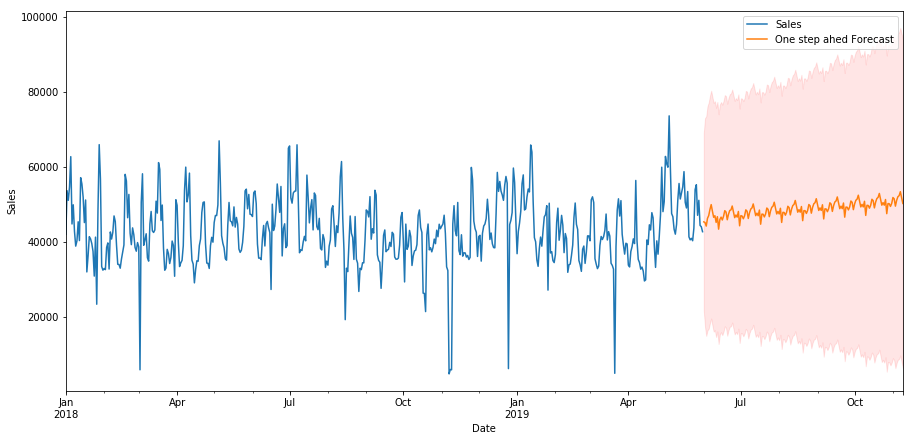

In [105]:
pred = results_sarima.get_prediction(start=516, end=677, dynamic=False)

# Get confidence interval of forecast 
pred_ci = pred.conf_int()

ax = train_arima['2018':].plot(label='Observed', figsize=(15,7))
pred.predicted_mean.plot(ax=ax, label='One step ahed Forecast', alpha=1)

ax.fill_between(pred_ci.index, 
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:,1],
               color='r', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [106]:
train_arima_forecasted = pred.predicted_mean

In [107]:
train_arima_forecasted.to_csv('predicted_data.csv')
print('Predicted Data Saved in output')

Predicted Data Saved in output


In [108]:
#read the data in csv
df_sales_test = pd.read_csv('TEST_FINAL.csv')

In [112]:
df_sales_finalpre=pd.concat([df_sales,df_sales_test])

In [117]:
df_sales_finalpre.shape

(210586, 10)

In [119]:
df_sales_finalpre.head(10)

,#Order,Date,Discount,Holiday,ID,Location_Type,Region_Code,Sales,Store_Type,Store_id
2018-01-01 00:00:00,9.0,NaN,Yes,1,NaN,L3,R1,7011.84,S1,1
2018-01-01 00:00:00,52.0,NaN,Yes,1,NaN,L1,R2,42293.94,S3,64
2018-01-01 00:00:00,60.0,NaN,Yes,1,NaN,L2,R2,46070.64,S1,65
2018-01-01 00:00:00,28.0,NaN,Yes,1,NaN,L3,R3,26151.12,S3,66
2018-01-01 00:00:00,65.0,NaN,Yes,1,NaN,L5,R1,44949.45,S2,67
2018-01-01 00:00:00,37.0,NaN,Yes,1,NaN,L1,R2,30395.52,S4,49
2018-01-01 00:00:00,77.0,NaN,Yes,1,NaN,L1,R2,57111.12,S1,48
2018-01-01 00:00:00,35.0,NaN,Yes,1,NaN,L3,R3,26910.84,S1,27
2018-01-01 00:00:00,61.0,NaN,Yes,1,NaN,L3,R3,46580.85,S1,37
2018-01-01 00:00:00,25.0,NaN,Yes,1,NaN,L1,R2,18729.36,S1,63


In [114]:
pred_test=results_sarima.get_prediction(start=516, end=677, dynamic=False)

In [115]:
test_arima_forecasted=pred_test.predicted_mean

In [116]:
test_arima_forecasted.to_csv('predicted_ontestdata.csv')